In [1]:
"Ce fichier permet de simuller une antenne ifa avec les parametres optimisés obtenue du script ifa_meander_optimize.py"

'Ce fichier permet de simuller une antenne ifa avec les parametres optimisés obtenue du script ifa_meander_optimize.py'

In [ ]:
from backend.utils.ifa_meander_project_v2.geometry import *
from backend.utils.ifa_meander_project_v2.meshing import *
from backend.utils.ifa_meander_project_v2.frequency import *
from backend.utils.ifa_meander_project_v2.simulation import *
from backend.utils.gmsh_function import extract_msh_to_mat
from backend.efield.efield4 import plot_s11_curve, plot_s11_curve_MoM_vs_Experiment, plot_s11_curve_CST_MoM

In [ ]:
fLow = 700e6
fHigh = 1000e6
fC = 868e6
step = 2e6

frequencies, fc_index, nPoints = generate_frequencies(fLow, fHigh, fC, step)

print(f"Number of frequencies (nPoints) : {nPoints}")
print(f"Index of fC : {fc_index}")

Number of frequencies (nPoints) : 101
Index of fC : 34


In [4]:
mesh_name = "sim_optimize_ifa.msh"
save_mesh_folder = 'data/gmsh_files/'
ifa_meander_mat = 'data/antennas_mesh/sim_optimize_ifa.mat'
ifa_meander_msh = save_mesh_folder + mesh_name

In [5]:
a = 27 / 1000  # Width
b = 55 / 1000  # Height

terminal_a = 92 / 1000
terminal_b = b
x_t = np.array([-terminal_a + a, 0, 0, -terminal_a + a])
y_t = np.array([terminal_b, terminal_b, 0, 0])

# Fix the short feed and track width
largeur_piste    = 5.400 / 1000
distance_meandre = 8.100 / 1000
feed = 33.552 / 1000
feed_point = np.array([0, feed, 0])

# mesh_size = 21.16 / 1000
# mesh_size = 16.20 / 1000
# mesh_size = 8.7 / 1000

mesh_size = 3 * largeur_piste
print(f"Mesh size : {mesh_size * 1000:.2f} mm")

Mesh size : 16.20 mm


In [6]:
def creation_ifa(largeur, hauteur, width, dist_meandre, feed, x_t, y_t, save_mesh_folder, mesh_name, mesh_size):
    x, y, N, distance_meandre = ifa_creation(largeur, hauteur, width, dist_meandre)
    x_m, y_m = trace_meander(x, y, width)
    feed_wid = width # The track width is the same everywhere
    feed_x = np.array([0, distance_meandre, distance_meandre, 0])
    feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed - feed_wid/2])
    antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, mesh_size)
    extract_msh_to_mat(ifa_meander_msh, ifa_meander_mat)
    return N, distance_meandre

distance meandres 8.1 mm
IFA track width 5.4 mm
feed position = 33.552 mm

Number of meanders 2
New meander distance 8.1 mm
Simulation 1/101 | f = 800.00 MHz | S11 = -3.81 dB
Simulation 2/101 | f = 802.00 MHz | S11 = -3.97 dB
Simulation 3/101 | f = 804.00 MHz | S11 = -4.13 dB
Simulation 4/101 | f = 806.00 MHz | S11 = -4.31 dB
Simulation 5/101 | f = 808.00 MHz | S11 = -4.49 dB
Simulation 6/101 | f = 810.00 MHz | S11 = -4.68 dB
Simulation 7/101 | f = 812.00 MHz | S11 = -4.88 dB
Simulation 8/101 | f = 814.00 MHz | S11 = -5.09 dB
Simulation 9/101 | f = 816.00 MHz | S11 = -5.31 dB
Simulation 10/101 | f = 818.00 MHz | S11 = -5.55 dB
Simulation 11/101 | f = 820.00 MHz | S11 = -5.80 dB
Simulation 12/101 | f = 822.00 MHz | S11 = -6.06 dB
Simulation 13/101 | f = 824.00 MHz | S11 = -6.33 dB
Simulation 14/101 | f = 826.00 MHz | S11 = -6.62 dB
Simulation 15/101 | f = 828.00 MHz | S11 = -6.93 dB
Simulation 16/101 | f = 830.00 MHz | S11 = -7.25 dB
Simulation 17/101 | f = 832.00 MHz | S11 = -7.60 dB
S


Image saved in PDF format: data/fig_image/sim_optimize_ifa_antenna_surface_current_in_radiation_mode.pdf

Simulation 35/101 | f = 868.00 MHz | S11 = -22.23 dB
Simulation 36/101 | f = 870.00 MHz | S11 = -24.66 dB
Simulation 37/101 | f = 872.00 MHz | S11 = -27.82 dB
Simulation 38/101 | f = 874.00 MHz | S11 = -31.75 dB
Simulation 39/101 | f = 876.00 MHz | S11 = -33.41 dB
Simulation 40/101 | f = 878.00 MHz | S11 = -29.99 dB
Simulation 41/101 | f = 880.00 MHz | S11 = -26.40 dB
Simulation 42/101 | f = 882.00 MHz | S11 = -23.66 dB
Simulation 43/101 | f = 884.00 MHz | S11 = -21.54 dB
Simulation 44/101 | f = 886.00 MHz | S11 = -19.83 dB
Simulation 45/101 | f = 888.00 MHz | S11 = -18.40 dB
Simulation 46/101 | f = 890.00 MHz | S11 = -17.19 dB
Simulation 47/101 | f = 892.00 MHz | S11 = -16.14 dB
Simulation 48/101 | f = 894.00 MHz | S11 = -15.21 dB
Simulation 49/101 | f = 896.00 MHz | S11 = -14.38 dB
Simulation 50/101 | f = 898.00 MHz | S11 = -13.64 dB
Simulation 51/101 | f = 900.00 MHz | S11 = -1


Image saved in PDF format (transparent background, minimal margins) : data/fig_image/ifa_M_opti3_Smith_chart.pdf


📡 Simulation results:
→ Resonance frequency = 876.00 MHz
→ Impedance at f_res  = 47.98-0.56j Ω


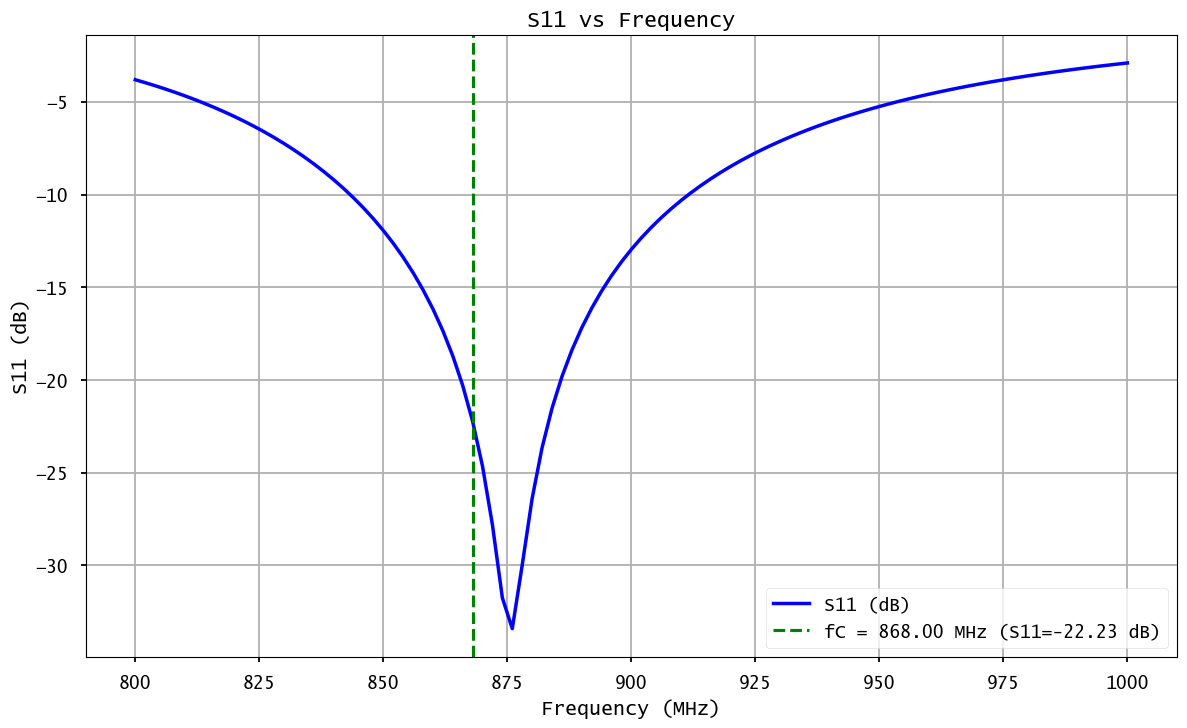

In [7]:
print(f"distance meandres {distance_meandre * 1000} mm")
print(f"IFA track width {largeur_piste * 1000} mm")
print(f"feed position = {feed * 1000} mm\n")

# Create the IFA antenna with meander
N_list_elem, new_distance_meandre_elem = creation_ifa(a, b, largeur_piste, distance_meandre, feed, x_t, y_t, save_mesh_folder, mesh_name, mesh_size)

print(f"Number of meanders {N_list_elem}")
print(f"New meander distance {new_distance_meandre_elem * 1000} mm")

# Simulate S11 and impedance at feed point
frequence_resonance, s11_db, R_res, X_res = simulate(frequencies, ifa_meander_mat, fC, feed_point)

# Plot S11 curve
plot_s11_curve(s11_db, fLow, fHigh, fC)


# Load CST data
cst_data_1 = np.loadtxt("data/plot_file/Plot_S11_Antenne_Ta_89_Tb_44_a_29.txt", skiprows=3)
# cst_data_1 = np.loadtxt("data/plot_file/Plot_S11_Antenne_Ta_92_Tb_55_a_27.txt", skiprows=3)
cst_freq_mhz = cst_data_1[:, 0]  # frequency already in MHz
cst_s11_db = cst_data_1[:, 1]

# Load S1P data
s1p_data = np.loadtxt("data/plot_file/IFA_1.s1p", comments='!', skiprows=5)
Experimentation_freq_mhz = s1p_data[:, 0] / 1e6  # frequency in MHz
Experimentation_s11_db = s1p_data[:, 1]

# Mask between fLow and fHigh
mask = (Experimentation_freq_mhz >= fLow / 1e6) & (Experimentation_freq_mhz <= fHigh / 1e6)
Experimentation_freq_mhz = Experimentation_freq_mhz[mask]
Experimentation_s11_db = Experimentation_s11_db[mask]

# plot_s11_curve_CST_MoM(s11_db, fLow, fHigh, cst_freq_mhz=cst_freq_mhz, cst_s11_db=cst_s11_db)
plot_s11_curve_MoM_vs_Experiment(s11_db, fLow, fHigh, s11_db_exp=Experimentation_s11_db, exp_freq_mhz=Experimentation_freq_mhz)


In [8]:
simulate_efficiency(frequencies, ifa_meander_mat, fC, feed_point, save_image=True)

Simulation 1/101 | f = 800.00 MHz | S11 = -3.81 dB
Calculating radiation intensity distribution over sphere surface...

Frequency = 800000000.0 Hz
Wavelength lambda = 0.37469044247576155 m

Total Power :  0.000572
Gain Linear :  1.569386
Gain Logarithmic (Max) :  1.957298 dBi

gap_current = (0.0022118995384554033+0.0015291139242810405j)
Radiation Resistance :  158.147592 Ohms
Input Power (P_in) : 0.0007 W
Total Efficiency : 0.8505
Data saved successfully to data/antennas_gain_power/sim_optimize_ifa_gain_power.mat
Generating antenna directivity pattern...
Data loaded from data/antennas_gain_power/sim_optimize_ifa_gain_power.mat
Data loaded from data/antennas_gain_power/sim_optimize_ifa_gain_power.mat
Simulation 2/101 | f = 802.00 MHz | S11 = -3.97 dB
Calculating radiation intensity distribution over sphere surface...

Frequency = 802000000.0 Hz
Wavelength lambda = 0.3737560523448993 m

Total Power :  0.000596
Gain Linear :  1.569857
Gain Logarithmic (Max) :  1.958600 dBi

gap_current = 

Simulation 35/101 | f = 868.00 MHz | S11 = -22.23 dB
Calculating radiation intensity distribution over sphere surface...

Frequency = 868000000.0 Hz
Wavelength lambda = 0.34533681334171573 m

Total Power :  0.002445
Gain Linear :  1.580685
Gain Logarithmic (Max) :  1.988452 dBi

gap_current = (0.009457041199728688+0.0014080117838545356j)
Radiation Resistance :  53.496604 Ohms
Input Power (P_in) : 0.0024 W
Total Efficiency : 1.0230
Data saved successfully to data/antennas_gain_power/sim_optimize_ifa_gain_power.mat
Generating antenna directivity pattern...
Data loaded from data/antennas_gain_power/sim_optimize_ifa_gain_power.mat
Data loaded from data/antennas_gain_power/sim_optimize_ifa_gain_power.mat
Simulation 36/101 | f = 870.00 MHz | S11 = -24.66 dB
Calculating radiation intensity distribution over sphere surface...

Frequency = 870000000.0 Hz
Wavelength lambda = 0.3445429356098957 m

Total Power :  0.002515
Gain Linear :  1.580858
Gain Logarithmic (Max) :  1.988928 dBi

gap_current 

# Étape 2 : Distribution de l'intensité du rayonnement sur une sphère
from efield.efield2 import radiation_intensity_distribution_over_sphere_surface
from efield.efield3 import antenna_directivity_pattern

impedance, *_ = radiation_algorithm(ifa_meander_mat, 868e6, feed_point, voltage_amplitude=0.5, show=True)

ifa_meander_mesh2 = 'data/antennas_mesh2/sim_optimize_ifa_mesh2.mat'
ifa_meander_current = 'data/antennas_current/sim_optimize_ifa_current.mat'
ifa_meander_gain_power = 'data/antennas_gain_power/sim_optimize_ifa_gain_power.mat'
filename_sphere_dense = '../../data/sphere_mesh/sphere_dense.mat'

# Étape 2 : Distribution de l'intensité du rayonnement sur une sphère
print("Calculating radiation intensity distribution over sphere surface...")
radiation_intensity_distribution_over_sphere_surface(ifa_meander_mesh2, ifa_meander_current, filename_sphere_dense, radiation=True, save_image=False)

# Étape 3 : Génération du diagramme de directivité
print("Generating antenna directivity pattern...")
antenna_directivity_pattern(ifa_meander_mesh2, ifa_meander_current, ifa_meander_gain_power, radiation=True)